In [1]:
# LAB1-1
# LAB1-1
# LAB1-1
# LAB1-1


import numpy as np
import cv2
import matplotlib
import pickle
import h5py
import glob
import time
from random import shuffle
from collections import Counter
from sklearn.model_selection import train_test_split
import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Dropout,Softmax
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,LeakyReLU,ReLU, AveragePooling2D
from keras.optimizers import SGD, Adam,RMSprop,Adagrad,Adadelta
from keras.layers.normalization import BatchNormalization
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)


Using TensorFlow backend.
C:\Users\user\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\test\lib\site-packages\t

In [2]:
map_characters ={ 0:'R_train',1:'L_train',2:'F_train',3:'B_train'
                }
num_classes = len(map_characters)
test_size = 0.1
imgsPath = "Lab1-1"
img_width = 32
img_height = 32

In [3]:
def load_pictures():
    pics = []
    labels = []
    
    for k, v in map_characters.items(): 
        
        pictures = [k for k in glob.glob(imgsPath + "/" + v + "/*")]        
        print(v + " : " + str(len(pictures))) 
        for i, pic in enumerate(pictures):
            tmp_img = cv2.imread(pic)
            tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB) ##
            tmp_img = cv2.resize(tmp_img, (img_height, img_width))          
            pics.append(tmp_img)
            labels.append(k)    
    return np.array(pics), np.array(labels)

In [4]:
def get_dataset(save=False, load=False):
    if load: 
        
        h5f = h5py.File('dataset.h5','r')
        X_train = h5f['X_train'][:]
        X_test = h5f['X_test'][:]
        h5f.close()
        
        
        h5f = h5py.File('labels.h5', 'r')
        y_train = h5f['y_train'][:]
        y_test = h5f['y_test'][:]
        h5f.close()
    else:
        
        X, y = load_pictures()
        y = keras.utils.to_categorical(y, num_classes) 
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
        if save: 
            h5f = h5py.File('dataset.h5', 'w')
            h5f.create_dataset('X_train', data=X_train)
            h5f.create_dataset('X_test', data=X_test)
            h5f.close()
            
            h5f = h5py.File('labels.h5', 'w')
            h5f.create_dataset('y_train', data=y_train)
            h5f.create_dataset('y_test', data=y_test)
            h5f.close()
    
    
    X_train = X_train.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    print("Train", X_train.shape, y_train.shape)
    print("Test", X_test.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test   

In [5]:
X_train, X_test, y_train, y_test = get_dataset(save=False, load=False)

R_train : 4865
L_train : 4712
F_train : 4877
B_train : 5037
Train (17541, 32, 32, 3) (17541, 4)
Test (1950, 32, 32, 3) (1950, 4)


In [6]:
#Zedboard
def create_model_face(input_shape):
    kernel_size=3
    model = Sequential([
    Conv2D(32, (kernel_size, kernel_size), input_shape=input_shape, padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    #ReLU(),
    Dropout(0.25),
    
    #Conv2D(32, (kernel_size, kernel_size), activation='relu', padding='same'),
    #AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    #Dropout(0.25),
    
    Conv2D(64, (kernel_size, kernel_size), activation='relu', padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
        
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')#有幾類?
    ])
    
    
    
    
    return model;

In [7]:
model = create_model_face((img_height, img_width, 3)) ### 初始化一個模型
model.summary() # 秀出模型架構






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         

In [8]:
#original
sgd = SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy' ])

In [9]:
valation_size = 0.1
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=valation_size) 
print(X_train2.shape)
print(y_train2.shape)

(15786, 32, 32, 3)
(15786, 4)


In [10]:
batch_size = 64
epochs = 500
history = model.fit(X_train2, y_train2,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_val, y_val),
         shuffle=True,
         callbacks=[
             #LearningRateScheduler(lr_schedule),
             ModelCheckpoint('classifier_lab1102.h5', save_best_only=True)
         ]
                   )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15786 samples, validate on 1755 samples
Epoch 1/500
15786/15786 [==============================] - 10s 613us/step - loss: 1.2604 - acc: 0.4160 - val_loss: 1.0719 - val_acc: 0.5510
Epoch 2/500
15786/15786 [==============================] - 9s 600us/step - loss: 1.0836 - acc: 0.5398 - val_loss: 0.9132 - val_acc: 0.6285
Epoch 3/500
15786/15786 [==============================] - 9s 601us/step - loss: 0.9569 - acc: 0.6086 - val_loss: 0.8089 - val_acc: 0.6684
Epoch 4/500
15786/15786 [==============================] - 9s 600us/step - loss: 0.8613 - acc: 0.6523 - val_loss: 0.7514 - val_acc: 0.6900
Epoch 5/500
15786/15786 [==============================] - 9s 601us/step - loss: 0.7976 - acc: 0.6812 - val_loss: 0.6890 - val_acc: 0.7254
Epoch 6/500
15786/15786 [==============================] - 9s 600us/step - loss: 0.7484 - acc: 0.7018 - val_loss: 0.6340 - val_acc: 0.7464
Epoch 7/500
15786/1578

15786/15786 [==============================] - 9s 599us/step - loss: 0.3058 - acc: 0.8808 - val_loss: 0.4768 - val_acc: 0.8581
Epoch 57/500
15786/15786 [==============================] - 10s 603us/step - loss: 0.3100 - acc: 0.8808 - val_loss: 0.5208 - val_acc: 0.8462
Epoch 58/500
15786/15786 [==============================] - 9s 600us/step - loss: 0.3098 - acc: 0.8784 - val_loss: 0.4899 - val_acc: 0.8479
Epoch 59/500
15786/15786 [==============================] - 9s 601us/step - loss: 0.2970 - acc: 0.8865 - val_loss: 0.4548 - val_acc: 0.8621
Epoch 60/500
15786/15786 [==============================] - 10s 603us/step - loss: 0.2861 - acc: 0.8860 - val_loss: 0.4848 - val_acc: 0.8632
Epoch 61/500
15786/15786 [==============================] - 9s 600us/step - loss: 0.2940 - acc: 0.8859 - val_loss: 0.4694 - val_acc: 0.8627
Epoch 62/500
15786/15786 [==============================] - 10s 610us/step - loss: 0.2978 - acc: 0.8830 - val_loss: 0.4798 - val_acc: 0.8541
Epoch 63/500
15786/15786 [====

15786/15786 [==============================] - 10s 604us/step - loss: 0.2393 - acc: 0.9078 - val_loss: 0.5003 - val_acc: 0.8632
Epoch 115/500
15786/15786 [==============================] - 9s 601us/step - loss: 0.2474 - acc: 0.9080 - val_loss: 0.4872 - val_acc: 0.8741
Epoch 116/500
15786/15786 [==============================] - 9s 601us/step - loss: 0.2442 - acc: 0.9076 - val_loss: 0.4746 - val_acc: 0.8712
Epoch 117/500
15786/15786 [==============================] - 9s 600us/step - loss: 0.2621 - acc: 0.8997 - val_loss: 0.4924 - val_acc: 0.8650
Epoch 118/500
15786/15786 [==============================] - 9s 598us/step - loss: 0.2458 - acc: 0.9071 - val_loss: 0.4254 - val_acc: 0.8741
Epoch 119/500
15786/15786 [==============================] - 9s 601us/step - loss: 0.2526 - acc: 0.9054 - val_loss: 0.4827 - val_acc: 0.8655
Epoch 120/500
15786/15786 [==============================] - 9s 600us/step - loss: 0.2448 - acc: 0.9074 - val_loss: 0.4826 - val_acc: 0.8707
Epoch 121/500
15786/15786 

Epoch 172/500
15786/15786 [==============================] - 10s 603us/step - loss: 0.2219 - acc: 0.9172 - val_loss: 0.4931 - val_acc: 0.8746
Epoch 173/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.2142 - acc: 0.9201 - val_loss: 0.6067 - val_acc: 0.8718
Epoch 174/500
15786/15786 [==============================] - 10s 610us/step - loss: 0.2168 - acc: 0.9200 - val_loss: 0.4675 - val_acc: 0.8684
Epoch 175/500
15786/15786 [==============================] - 10s 606us/step - loss: 0.2214 - acc: 0.9149 - val_loss: 0.5620 - val_acc: 0.8530
Epoch 176/500
15786/15786 [==============================] - 10s 610us/step - loss: 0.2265 - acc: 0.9155 - val_loss: 0.5316 - val_acc: 0.8746
Epoch 177/500
15786/15786 [==============================] - 10s 607us/step - loss: 0.2261 - acc: 0.9171 - val_loss: 0.4903 - val_acc: 0.8655
Epoch 178/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.2116 - acc: 0.9204 - val_loss: 0.5172 - val_acc: 0.8735
Epoch 

Epoch 230/500
15786/15786 [==============================] - 10s 607us/step - loss: 0.1999 - acc: 0.9284 - val_loss: 0.5004 - val_acc: 0.8798
Epoch 231/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.2159 - acc: 0.9237 - val_loss: 0.5145 - val_acc: 0.8775
Epoch 232/500
15786/15786 [==============================] - 10s 606us/step - loss: 0.2166 - acc: 0.9204 - val_loss: 0.4885 - val_acc: 0.8906
Epoch 233/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.2052 - acc: 0.9261 - val_loss: 0.5459 - val_acc: 0.8826
Epoch 234/500
15786/15786 [==============================] - 10s 610us/step - loss: 0.2014 - acc: 0.9261 - val_loss: 0.4905 - val_acc: 0.8741
Epoch 235/500
15786/15786 [==============================] - 10s 606us/step - loss: 0.1936 - acc: 0.9294 - val_loss: 0.5420 - val_acc: 0.8769
Epoch 236/500
15786/15786 [==============================] - 10s 609us/step - loss: 0.2109 - acc: 0.9261 - val_loss: 0.5052 - val_acc: 0.8815
Epoch 

Epoch 288/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.1843 - acc: 0.9336 - val_loss: 0.5010 - val_acc: 0.8775
Epoch 289/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.1943 - acc: 0.9298 - val_loss: 0.4935 - val_acc: 0.8849
Epoch 290/500
15786/15786 [==============================] - 10s 606us/step - loss: 0.2057 - acc: 0.9278 - val_loss: 0.5129 - val_acc: 0.8997
Epoch 291/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.1938 - acc: 0.9284 - val_loss: 0.4696 - val_acc: 0.8815
Epoch 292/500
15786/15786 [==============================] - 10s 605us/step - loss: 0.1917 - acc: 0.9323 - val_loss: 0.4831 - val_acc: 0.8889
Epoch 293/500
15786/15786 [==============================] - 10s 607us/step - loss: 0.1930 - acc: 0.9320 - val_loss: 0.4795 - val_acc: 0.8917
Epoch 294/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.1881 - acc: 0.9346 - val_loss: 0.4867 - val_acc: 0.8872
Epoch 

Epoch 346/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.1946 - acc: 0.9294 - val_loss: 0.5134 - val_acc: 0.8986
Epoch 347/500
15786/15786 [==============================] - 10s 605us/step - loss: 0.1800 - acc: 0.9320 - val_loss: 0.4747 - val_acc: 0.8974
Epoch 348/500
15786/15786 [==============================] - 10s 609us/step - loss: 0.1787 - acc: 0.9387 - val_loss: 0.4958 - val_acc: 0.8986
Epoch 349/500
15786/15786 [==============================] - 10s 607us/step - loss: 0.1746 - acc: 0.9397 - val_loss: 0.5303 - val_acc: 0.8940
Epoch 350/500
15786/15786 [==============================] - 10s 605us/step - loss: 0.1930 - acc: 0.9330 - val_loss: 0.5111 - val_acc: 0.8917
Epoch 351/500
15786/15786 [==============================] - 10s 609us/step - loss: 0.1929 - acc: 0.9311 - val_loss: 0.4885 - val_acc: 0.8963
Epoch 352/500
15786/15786 [==============================] - 10s 605us/step - loss: 0.1735 - acc: 0.9404 - val_loss: 0.5608 - val_acc: 0.8934
Epoch 

Epoch 404/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.1768 - acc: 0.9371 - val_loss: 0.5049 - val_acc: 0.8940
Epoch 405/500
15786/15786 [==============================] - 10s 607us/step - loss: 0.1811 - acc: 0.9347 - val_loss: 0.4921 - val_acc: 0.8957
Epoch 406/500
15786/15786 [==============================] - 10s 610us/step - loss: 0.1758 - acc: 0.9364 - val_loss: 0.5950 - val_acc: 0.8786
Epoch 407/500
15786/15786 [==============================] - 10s 605us/step - loss: 0.1799 - acc: 0.9368 - val_loss: 0.5016 - val_acc: 0.8860
Epoch 408/500
15786/15786 [==============================] - 10s 611us/step - loss: 0.1644 - acc: 0.9409 - val_loss: 0.4870 - val_acc: 0.8963
Epoch 409/500
15786/15786 [==============================] - 10s 609us/step - loss: 0.1759 - acc: 0.9388 - val_loss: 0.5640 - val_acc: 0.8877
Epoch 410/500
15786/15786 [==============================] - 10s 605us/step - loss: 0.1838 - acc: 0.9341 - val_loss: 0.5083 - val_acc: 0.8849
Epoch 

Epoch 462/500
15786/15786 [==============================] - 10s 606us/step - loss: 0.1764 - acc: 0.9399 - val_loss: 0.6388 - val_acc: 0.8769
Epoch 463/500
15786/15786 [==============================] - 10s 607us/step - loss: 0.1761 - acc: 0.9386 - val_loss: 0.4823 - val_acc: 0.8991
Epoch 464/500
15786/15786 [==============================] - 10s 609us/step - loss: 0.1745 - acc: 0.9384 - val_loss: 0.5202 - val_acc: 0.8917
Epoch 465/500
15786/15786 [==============================] - 10s 607us/step - loss: 0.1793 - acc: 0.9377 - val_loss: 0.5083 - val_acc: 0.8963
Epoch 466/500
15786/15786 [==============================] - 10s 608us/step - loss: 0.1736 - acc: 0.9373 - val_loss: 0.5158 - val_acc: 0.8689
Epoch 467/500
15786/15786 [==============================] - 10s 606us/step - loss: 0.1844 - acc: 0.9357 - val_loss: 0.5280 - val_acc: 0.8900
Epoch 468/500
15786/15786 [==============================] - 10s 609us/step - loss: 0.1666 - acc: 0.9415 - val_loss: 0.5115 - val_acc: 0.8843
Epoch 

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

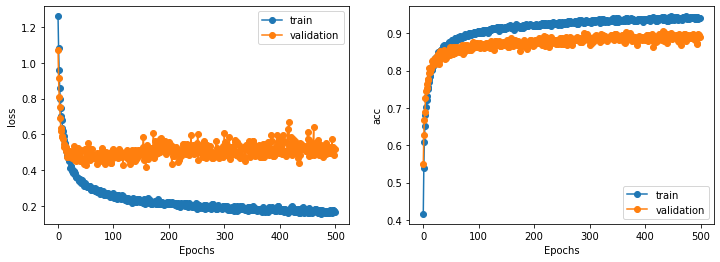

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')

plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

plt.show()

In [13]:
#X_test = np.expand_dims(X_test, axis=-1)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
loss,accuracy_test=model.evaluate(X_test,y_test)
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm_test = confusion_matrix(y_test, y_pred)
#recall_test = recall_score(y_test,y_pred,average='micro')
#precision_test = precision_score(y_test,y_pred,average='micro')
#f1_score_test = f1_score(y_test,y_pred,average='micro')

1950/1950 [==============================] - 0s 188us/step


In [14]:
cm_test

array([[424,   4,  24,  36],
       [  5, 460,  28,  15],
       [ 32,  16, 408,  21],
       [ 16,  20,  10, 431]], dtype=int64)

In [15]:
#recall test
recall_R_test=cm_test[0][0]/(cm_test[0][0]+cm_test[1][0]+cm_test[2][0]+cm_test[3][0])
recall_L_test=cm_test[1][1]/(cm_test[0][1]+cm_test[1][1]+cm_test[2][1]+cm_test[3][1])
recall_F_test=cm_test[2][2]/(cm_test[0][2]+cm_test[1][2]+cm_test[2][2]+cm_test[3][2])
recall_B_test=cm_test[3][3]/(cm_test[0][3]+cm_test[1][3]+cm_test[2][3]+cm_test[3][3])
print(recall_R_test,recall_L_test,recall_F_test,recall_B_test)

0.8888888888888888 0.92 0.8680851063829788 0.856858846918489


In [16]:
#precision test
precision_R_test=cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]+cm_test[0][2]+cm_test[0][3])
precision_L_test=cm_test[1][1]/(cm_test[1][0]+cm_test[1][1]+cm_test[1][2]+cm_test[1][3])
precision_F_test=cm_test[2][2]/(cm_test[2][0]+cm_test[2][1]+cm_test[2][2]+cm_test[2][3])
precision_B_test=cm_test[3][3]/(cm_test[3][0]+cm_test[3][1]+cm_test[3][2]+cm_test[3][3])
print(precision_R_test,precision_L_test,precision_F_test,precision_B_test)

0.8688524590163934 0.905511811023622 0.8553459119496856 0.9035639412997903


In [17]:
#f1score test
f1score_R_test=2/((1/precision_R_test)+1/recall_R_test)
f1score_L_test=2/((1/precision_L_test)+1/recall_L_test)
f1score_F_test=2/((1/precision_F_test)+1/recall_F_test)
f1score_B_test=2/((1/precision_B_test)+1/recall_B_test)
print(f1score_R_test,f1score_L_test,f1score_F_test,f1score_B_test)

0.8787564766839379 0.9126984126984128 0.8616684266103484 0.8795918367346939


In [18]:
#accuary test
accuracy_test

0.8835897432229458

In [19]:
loss_val,accuracy_val=model.evaluate(X_val,y_val)
yyy_pred=model.predict(X_val) 
yyy_pred=np.argmax(yyy_pred, axis=1)
y_val=np.argmax(y_val, axis=1)
cm_val = confusion_matrix(y_val, yyy_pred)
#recall_val = recall_score(y_val,yyy_pred,average='micro')
#precision_val = precision_score(y_val,yyy_pred,average='micro')
#f1_score_val = f1_score(y_val,yyy_pred,average='micro')

1755/1755 [==============================] - 0s 182us/step


In [20]:
cm_val

array([[400,   4,  14,  30],
       [ 11, 343,  23,  19],
       [ 31,  18, 374,  13],
       [  6,  12,  14, 443]], dtype=int64)

In [21]:
#recall val
recall_R_val=cm_val[0][0]/(cm_val[0][0]+cm_val[1][0]+cm_val[2][0]+cm_val[3][0])
recall_L_val=cm_val[1][1]/(cm_val[0][1]+cm_val[1][1]+cm_val[2][1]+cm_val[3][1])
recall_F_val=cm_val[2][2]/(cm_val[0][2]+cm_val[1][2]+cm_val[2][2]+cm_val[3][2])
recall_B_val=cm_val[3][3]/(cm_val[0][3]+cm_val[1][3]+cm_val[2][3]+cm_val[3][3])
print(recall_R_val,recall_L_val,recall_F_val,recall_B_val)

0.8928571428571429 0.9098143236074271 0.88 0.8772277227722772


In [22]:
#precision val
precision_R_val=cm_val[0][0]/(cm_val[0][0]+cm_val[0][1]+cm_val[0][2]+cm_val[0][3])
precision_L_val=cm_val[1][1]/(cm_val[1][0]+cm_val[1][1]+cm_val[1][2]+cm_val[1][3])
precision_F_val=cm_val[2][2]/(cm_val[2][0]+cm_val[2][1]+cm_val[2][2]+cm_val[2][3])
precision_B_val=cm_val[3][3]/(cm_val[3][0]+cm_val[3][1]+cm_val[3][2]+cm_val[3][3])
print(precision_R_val,precision_L_val,precision_F_val,precision_B_val)

0.8928571428571429 0.8661616161616161 0.8577981651376146 0.9326315789473684


In [23]:
#f1score val
f1score_R_val=2/((1/precision_R_val)+1/recall_R_val)
f1score_L_val=2/((1/precision_L_val)+1/recall_L_val)
f1score_F_val=2/((1/precision_F_val)+1/recall_F_val)
f1score_B_val=2/((1/precision_B_val)+1/recall_B_val)
print(f1score_R_val,f1score_L_val,f1score_F_val,f1score_B_val)

0.8928571428571429 0.8874514877102199 0.8687572590011614 0.9040816326530613


In [24]:
#accuary val
accuracy_val

0.8888888892285165

In [25]:
loss_train,accuracy_train=model.evaluate(X_train,y_train)
yy_pred=model.predict(X_train) 
yy_pred=np.argmax(yy_pred, axis=1)
y_train=np.argmax(y_train, axis=1)
cm_train = confusion_matrix(y_train, yy_pred)
#recall_train = recall_score(y_train,yy_pred,average='micro')
#precision_train = precision_score(y_train,yy_pred,average='micro')
#f1_score_train = f1_score(y_train,yy_pred,average='micro')

17541/17541 [==============================] - 3s 186us/step


In [26]:
cm_train

array([[4320,    4,   16,   37],
       [  11, 4145,   26,   22],
       [  32,   19, 4335,   14],
       [   8,   14,   19, 4519]], dtype=int64)

In [27]:
#recall train
recall_R_train=cm_train[0][0]/(cm_train[0][0]+cm_train[1][0]+cm_train[2][0]+cm_train[3][0])
recall_L_train=cm_train[1][1]/(cm_train[0][1]+cm_train[1][1]+cm_train[2][1]+cm_train[3][1])
recall_F_train=cm_train[2][2]/(cm_train[0][2]+cm_train[1][2]+cm_train[2][2]+cm_train[3][2])
recall_B_train=cm_train[3][3]/(cm_train[0][3]+cm_train[1][3]+cm_train[2][3]+cm_train[3][3])
print(recall_R_train,recall_L_train,recall_F_train,recall_B_train)

0.9883321894303363 0.9911525585844094 0.9861237488626023 0.984102787456446


In [28]:
#precision train
precision_R_train=cm_train[0][0]/(cm_train[0][0]+cm_train[0][1]+cm_train[0][2]+cm_train[0][3])
precision_L_train=cm_train[1][1]/(cm_train[1][0]+cm_train[1][1]+cm_train[1][2]+cm_train[1][3])
precision_F_train=cm_train[2][2]/(cm_train[2][0]+cm_train[2][1]+cm_train[2][2]+cm_train[2][3])
precision_B_train=cm_train[3][3]/(cm_train[3][0]+cm_train[3][1]+cm_train[3][2]+cm_train[3][3])
print(precision_R_train,precision_L_train,precision_F_train,precision_B_train)

0.9869773817683345 0.985965746907707 0.9852272727272727 0.9910087719298246


In [29]:
#f1score train
f1score_R_train=2/((1/precision_R_train)+1/recall_R_train)
f1score_L_train=2/((1/precision_L_train)+1/recall_L_train)
f1score_F_train=2/((1/precision_F_train)+1/recall_F_train)
f1score_B_train=2/((1/precision_B_train)+1/recall_B_train)
print(f1score_R_train,f1score_L_train,f1score_F_train,f1score_B_train)

0.9876543209876542 0.9885523491533509 0.985675306957708 0.9875437062937062


In [30]:
#accuary train
accuracy_train

0.9873439370617411

In [31]:
# LAB1-2
# LAB1-2
# LAB1-2
# LAB1-2





from keras.models import load_model

# 刪除既有模型變數
#del model 

# 載入模型
model = load_model('classifier_lab1102.h5')

In [32]:
#看模型內的資料(只是測試可跳過)
# import numpy as np
# from time import perf_counter
# from keras.preprocessing import image
# total_time1=0
# s = time.perf_counter()
# img = image.load_img(''), target_size = (img_width, img_height))
# e= time.perf_counter()
# print()

# total_time=0
# img_width, img_height = 32, 32
# paths=['R_train','L_train','F_train','B_train']
# for path in paths:
#     files= os.listdir(path) #得到資料夾下的所有檔名稱
#     A=[]
#     for file in files: #遍歷資料夾
#         start = time.perf_counter()
#         img = image.load_img(path+'/'+file, target_size = (img_width, img_height))
#         img = image.img_to_array(img)
#         img = np.expand_dims(img, axis = 0)
        
#         pred=model.predict(img)[0]
#         end = time.perf_counter()
#         total=end-start
#         total_time=total_time+total
#         #print(pred)
#         list1=pred.tolist()
#         Ans=list1.index(max(list1))
#         A.append(map_characters[Ans])
#         #print(map_characters[Ans])
#     print("cnt=",len(A),"\ncnt_R=",A.count('R_train'),"\ncnt_L=",A.count('L_train'),"\ncnt_F=",A.count('F_train'),"\ncnt_B=",A.count('B_train'),"\ntotal_time=",total_time,"\naverage_time=",total_time/len(A))
#     print("\n")

In [35]:
#我們拍的資料
import numpy as np
from time import perf_counter
from keras.preprocessing import image

to1=0
pathh = 'Lab1-2/R/LINE_ALBUM_R_211103_0.jpg'
s = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e= time.perf_counter()
print(pathh," spent: ",e-s)
print(pathh," = ","Face_R","\n")


pathh = 'Lab1-2/R/LINE_ALBUM_R_211103_9.jpg'
s1 = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e1= time.perf_counter()
print(pathh," spent: ",e1-s1)
print(pathh," = ","Face_R","\n","\n","\n")

total_time=0
img_width, img_height = 32, 32
paths=['Lab1-2/R/']
for path in paths:
    files= os.listdir(path) #得到資料夾下的所有檔名稱
    A=[]
    for file in files: #遍歷資料夾
        start = time.perf_counter()
        img = image.load_img(path+'/'+file, target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)

        pred=model.predict(img)[0]
        #print(pred)
        end = time.perf_counter()
        total=end-start
        total_time=total_time+total
        list1=pred.tolist()
        Ans=list1.index(max(list1))
        A.append(map_characters[Ans])
        #print(map_characters[Ans])
    print("cnt=",len(A),"\ncnt_R=",A.count('R_train'),"\ncnt_L=",A.count('L_train'),"\ncnt_F=",A.count('F_train'),"\ncnt_B=",A.count('B_train'),"\ntotal_time=",total_time,"\naverage_time=",total_time/len(A))
    print("\n")

Lab1-2/R/LINE_ALBUM_R_211103_0.jpg  spent:  0.01690839999992022
Lab1-2/R/LINE_ALBUM_R_211103_0.jpg  =  Face_R 

Lab1-2/R/LINE_ALBUM_R_211103_9.jpg  spent:  0.007449600000200007
Lab1-2/R/LINE_ALBUM_R_211103_9.jpg  =  Face_R 
 
 

cnt= 29 
cnt_R= 15 
cnt_L= 2 
cnt_F= 8 
cnt_B= 4 
total_time= 0.5739438000009613 
average_time= 0.019791165517274528




In [36]:
#我們拍的資料
import numpy as np
from time import perf_counter
from keras.preprocessing import image

to1=0
pathh = 'Lab1-2/L/LINE_ALBUM_L_211103_0.jpg'
s = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e= time.perf_counter()
print(pathh," spent: ",e-s)
print(pathh," = ","Face_L","\n")


pathh = 'Lab1-2/L/LINE_ALBUM_L_211103_4_0.jpg'
s1 = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e1= time.perf_counter()
print(pathh," spent: ",e1-s1)
print(pathh," = ","Face_L","\n","\n","\n")

total_time=0
img_width, img_height = 32, 32
paths=['Lab1-2/L']
for path in paths:
    files= os.listdir(path) #得到資料夾下的所有檔名稱
    A=[]
    for file in files: #遍歷資料夾
        start = time.perf_counter()
        img = image.load_img(path+'/'+file, target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)

        pred=model.predict(img)[0]
        #print(pred)
        end = time.perf_counter()
        total=end-start
        total_time=total_time+total
        list1=pred.tolist()
        Ans=list1.index(max(list1))
        A.append(map_characters[Ans])
        #print(map_characters[Ans])
    print("cnt=",len(A),"\ncnt_R=",A.count('R_train'),"\ncnt_L=",A.count('L_train'),"\ncnt_F=",A.count('F_train'),"\ncnt_B=",A.count('B_train'),"\ntotal_time=",total_time,"\naverage_time=",total_time/len(A))
    print("\n")

Lab1-2/L/LINE_ALBUM_L_211103_0.jpg  spent:  0.011539000000084343
Lab1-2/L/LINE_ALBUM_L_211103_0.jpg  =  Face_L 

Lab1-2/L/LINE_ALBUM_L_211103_4_0.jpg  spent:  0.012322600000061357
Lab1-2/L/LINE_ALBUM_L_211103_4_0.jpg  =  Face_L 
 
 

cnt= 32 
cnt_R= 1 
cnt_L= 22 
cnt_F= 7 
cnt_B= 2 
total_time= 0.5545626999996784 
average_time= 0.01733008437498995




In [37]:
#我們拍的資料
import numpy as np
from time import perf_counter
from keras.preprocessing import image

to1=0
pathh = 'Lab1-2/F/LINE_ALBUM_F_211103_0.jpg'
s = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e= time.perf_counter()
print(pathh," spent: ",e-s)
print(pathh," = ","Face_F","\n")


pathh = 'Lab1-2/F/LINE_ALBUM_F_211103_24.jpg'
s1 = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e1= time.perf_counter()
print(pathh," spent: ",e1-s1)
print(pathh," = ","Face_F","\n","\n","\n")

total_time=0
img_width, img_height = 32, 32
paths=['Lab1-2/F']
for path in paths:
    files= os.listdir(path) #得到資料夾下的所有檔名稱
    A=[]
    for file in files: #遍歷資料夾
        start = time.perf_counter()
        img = image.load_img(path+'/'+file, target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)

        pred=model.predict(img)[0]
        #print(pred)
        end = time.perf_counter()
        total=end-start
        total_time=total_time+total
        list1=pred.tolist()
        Ans=list1.index(max(list1))
        A.append(map_characters[Ans])
        #print(map_characters[Ans])
    print("cnt=",len(A),"\ncnt_R=",A.count('R_train'),"\ncnt_L=",A.count('L_train'),"\ncnt_F=",A.count('F_train'),"\ncnt_B=",A.count('B_train'),"\ntotal_time=",total_time,"\naverage_time=",total_time/len(A))
    print("\n")

Lab1-2/F/LINE_ALBUM_F_211103_0.jpg  spent:  0.010295599999608385
Lab1-2/F/LINE_ALBUM_F_211103_0.jpg  =  Face_F 

Lab1-2/F/LINE_ALBUM_F_211103_24.jpg  spent:  0.0071975999999267515
Lab1-2/F/LINE_ALBUM_F_211103_24.jpg  =  Face_F 
 
 

cnt= 31 
cnt_R= 2 
cnt_L= 3 
cnt_F= 26 
cnt_B= 0 
total_time= 0.4596196000006785 
average_time= 0.014826438709699305




In [38]:
#我們拍的資料
import numpy as np
from time import perf_counter
from keras.preprocessing import image


to1=0
pathh = 'Lab1-2/B/LINE_ALBUM_B_211103_0.jpg'
s = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e= time.perf_counter()
print(pathh," spent: ",e-s)
print(pathh," = ","Face_B","\n")


pathh = 'Lab1-2/B/LINE_ALBUM_B_211103_30.jpg'
s1 = time.perf_counter()
img = image.load_img(pathh, target_size = (32, 32))
e1= time.perf_counter()
print(pathh," spent: ",e1-s1)
print(pathh," = ","Face_B","\n","\n","\n")

total_time=0
img_width, img_height = 32, 32
paths=['Lab1-2/B']
for path in paths:
    files= os.listdir(path) #得到資料夾下的所有檔名稱
    A=[]
    for file in files: #遍歷資料夾
        start = time.perf_counter()
        img = image.load_img(path+'/'+file, target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)

        pred=model.predict(img)[0]
        #print(pred)
        end = time.perf_counter()
        total=end-start
        total_time=total_time+total
        list1=pred.tolist()
        Ans=list1.index(max(list1))
        A.append(map_characters[Ans])
        #print(map_characters[Ans])
    print("cnt=",len(A),"\ncnt_R=",A.count('R_train'),"\ncnt_L=",A.count('L_train'),"\ncnt_F=",A.count('F_train'),"\ncnt_B=",A.count('B_train'),"\ntotal_time=",total_time,"\naverage_time=",total_time/len(A))
    print("\n")

Lab1-2/B/LINE_ALBUM_B_211103_0.jpg  spent:  0.035618300000351155
Lab1-2/B/LINE_ALBUM_B_211103_0.jpg  =  Face_B 

Lab1-2/B/LINE_ALBUM_B_211103_30.jpg  spent:  0.012592399999903137
Lab1-2/B/LINE_ALBUM_B_211103_30.jpg  =  Face_B 
 
 

cnt= 31 
cnt_R= 5 
cnt_L= 5 
cnt_F= 7 
cnt_B= 14 
total_time= 0.8859118000009403 
average_time= 0.02857780000003033


